In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

C:\Users\asus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\asus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X = data.iloc[:,2:-1]
y = data.iloc[:,-1]

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
X = sc.fit_transform(X)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [50]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [51]:
y_pred = svc.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test,y_pred)

0.89

In [54]:
x_set, y_set = x_train, y_train

In [55]:
import numpy as np

In [56]:
xx = np.arange(x_set[:,0].min() - 1, x_set[:,0].max() + 1, step=0.01)

In [57]:
xx.shape

(602,)

In [58]:
x_train.shape

(300, 2)

In [59]:
yy = np.arange(x_set[:,1].min() - 1, x_set[:,1].max() + 1, step=0.01)

In [60]:
x1,x2 = np.meshgrid(xx,yy)

In [61]:
z = svc.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

In [62]:
from matplotlib.colors import ListedColormap

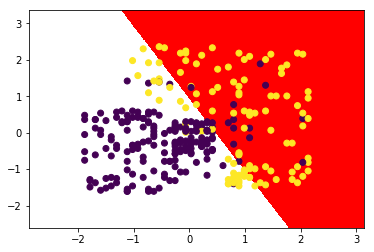

In [63]:
plt.contourf(x1,x2,z,cmap=ListedColormap(('white','red')))
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

In [81]:
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [82]:
z = svc.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

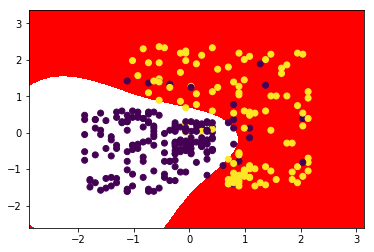

In [83]:
plt.contourf(x1,x2,z,cmap=ListedColormap(('white','red')), linestyles=['--', '-', '--'])
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)